In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
y = data['Price']
X = data.drop('Price', axis=1)

In [ ]:
y.shape, X.shape

((20640,), (20640, 8))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


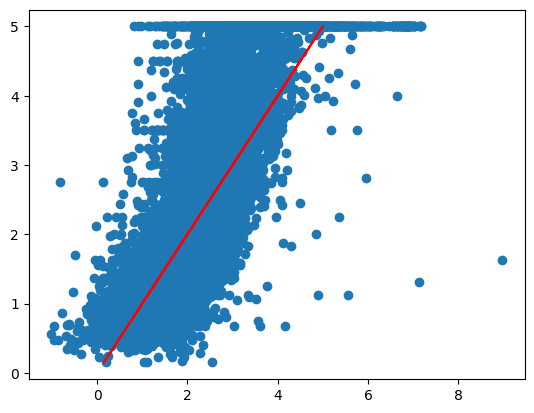

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [ ]:
model.score(X, y)

0.606232685199805

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [ ]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

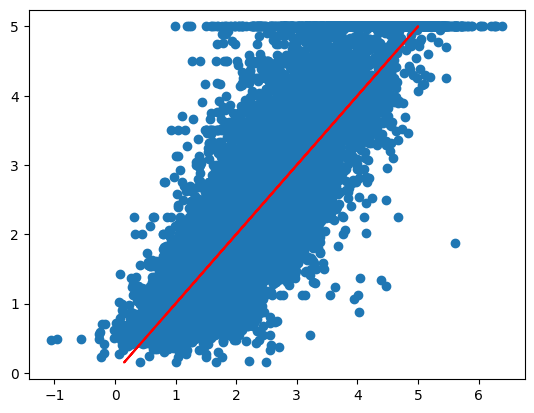

In [ ]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.7460745292501869

Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

for i in range(1, 7):
  poly = PolynomialFeatures(i).fit_transform(X)
  polynomial = LinearRegression()
  polynomial.fit(poly, y)
  y_pred_poly = polynomial.predict(poly)
  print(i)
  print(f"Score = {polynomial.score(poly, y)}")
  print(f"MSE = {mean_squared_error(y_pred_poly, y)}")
  print(f"MAE = {mean_absolute_error(y_pred_poly, y)}")

1
Score = 0.606232685199805
MSE = 0.5243209861846072
MAE = 0.5311643817548711
2
Score = 0.6832976293317483
MSE = 0.4217051366999303
MAE = 0.4614262254571655
3
Score = 0.737849333316931
MSE = 0.3490667988884864
MAE = 0.41998129393396144
4
Score = 0.7452728342280677
MSE = 0.3391820340226048
MAE = 0.4114041456748878
5
Score = 0.7460745292501869
MSE = 0.338114536775328
MAE = 0.4164426417208405
6
Score = 0.6374872358657175
MSE = 0.4827039798664893
MAE = 0.5019657355193794


In [ ]:
model = LinearRegression(fit_intercept = False)
model.fit(X, y)
y_pred = model.predict(X)
print(f"Score = {model.score(X, y)}")
print(f"MSE = {mean_squared_error(y_pred, y)}")
print(f"MAE = {mean_absolute_error(y_pred, y)}")

Score = 0.5462360656980104
MSE = 0.6042095028861159
MAE = 0.5727102707655315


In [ ]:
model = LinearRegression(positive=True)
model.fit(X, y)
y_pred = model.predict(X)
print(f"Score = {model.score(X, y)}")
print(f"MSE = {mean_squared_error(y_pred, y)}")
print(f"MAE = {mean_absolute_error(y_pred, y)}")

Score = 0.5102266082924921
MSE = 0.6521579067002169
MAE = 0.602423321614304


Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

LinearRegression()
Mean squared error: 0.52
score = 0.606232685199805


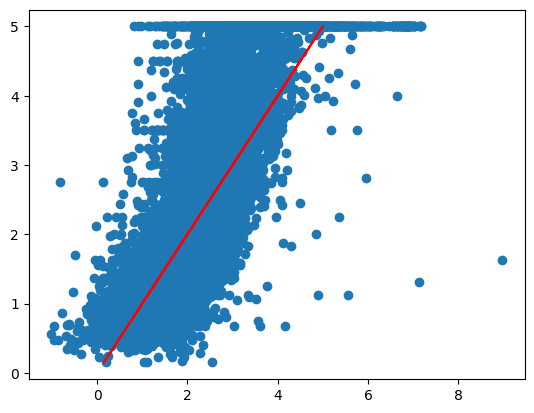


Ridge(random_state=42)
Mean squared error: 0.52
score = 0.6062326586911464


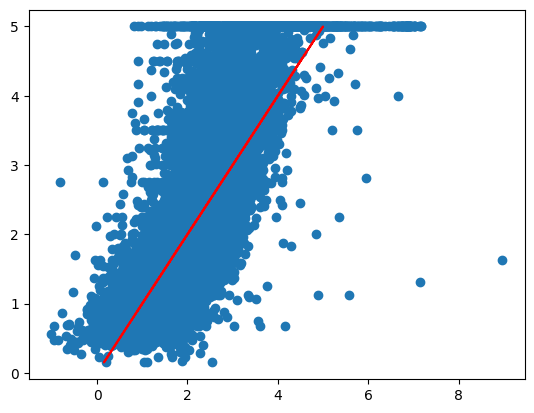


Lasso(random_state=42)
Mean squared error: 0.95
score = 0.28526231449198314


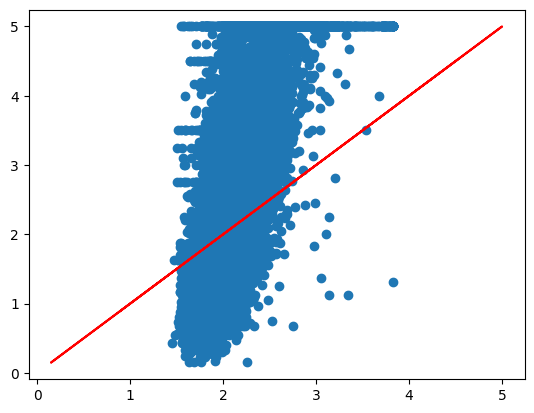


KNeighborsRegressor()
Mean squared error: 0.70
score = 0.4711185944964351


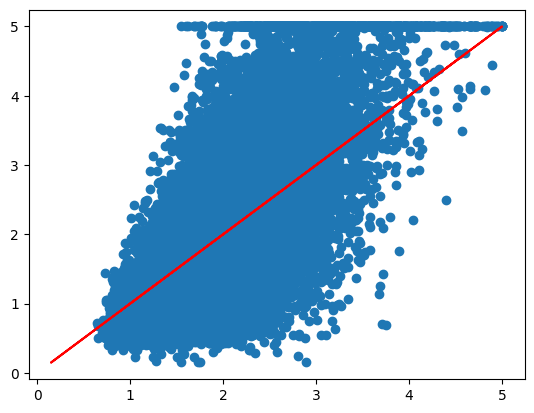


KNeighborsRegressor(n_neighbors=10)
Mean squared error: 0.88
score = 0.3396708904820539


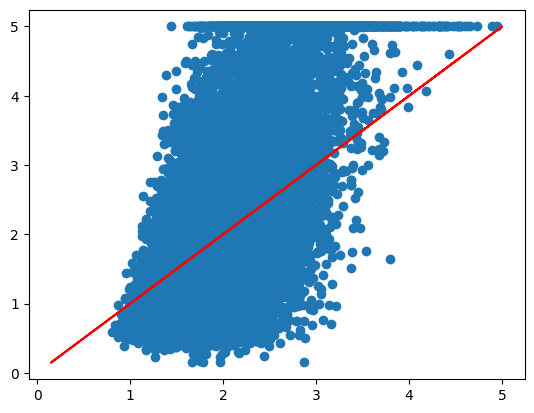


MLPRegressor(max_iter=700)
Mean squared error: 1.04
score = 0.2220138408555452


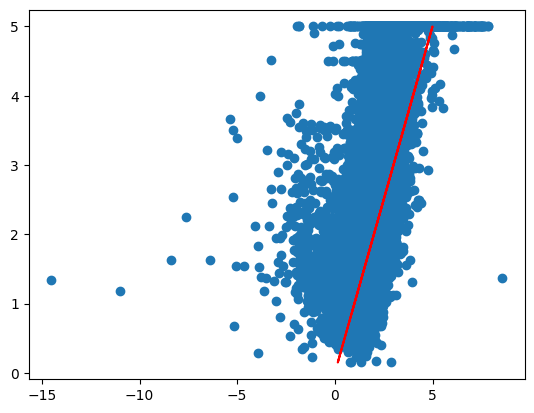


DecisionTreeRegressor()
Mean squared error: 0.00
score = 1.0


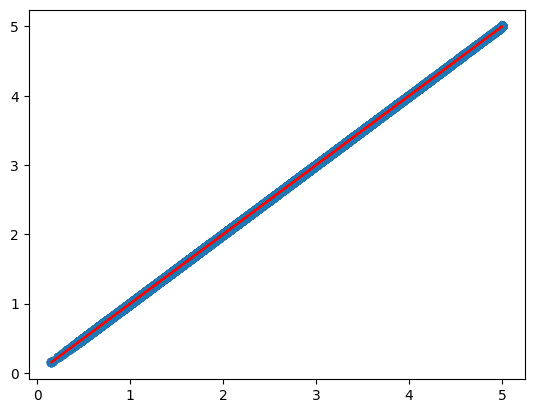


RandomForestRegressor(random_state=42)
Mean squared error: 0.03
score = 0.9739753020308555


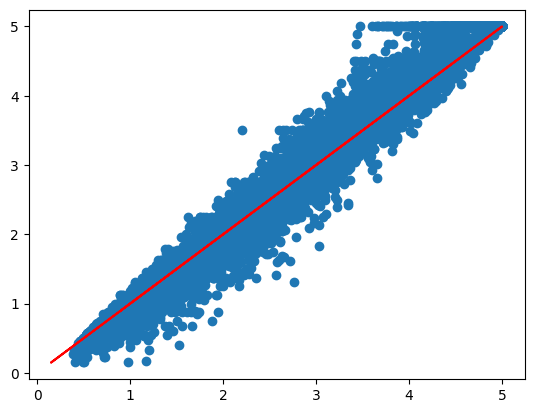


BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)
Mean squared error: 0.03
score = 0.9739532142954278


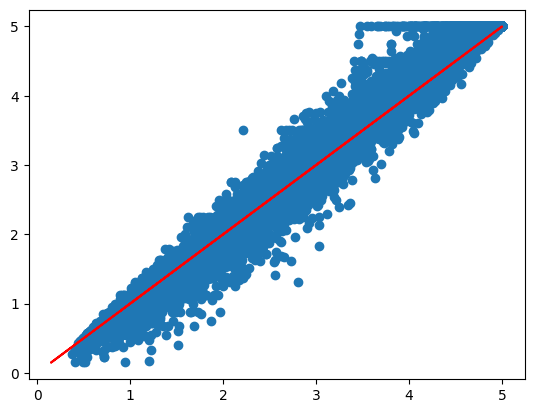

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

models = [LinearRegression(), Ridge(alpha=1.0, random_state=42), Lasso(alpha=1.0, random_state=42),
          KNeighborsRegressor(n_neighbors=5), KNeighborsRegressor(n_neighbors=10),
          MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, max_iter=700),
          DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100, random_state=42),
          BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)]

for model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    print(model)
    print("Mean squared error: %.2f"
          % mean_squared_error(y_pred, y))
    print(f"score = {model.score(X, y)}")
    plt.scatter(y_pred, y)
    plt.plot(y, y, c='r')
    plt.show()
    print()

Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [ ]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
X, y = dataset["data"], dataset["target"]

In [ ]:
X.shape

(442, 10)

In [ ]:
y.shape

(442,)

In [ ]:
for i in range(1, 10):
  poly = PolynomialFeatures(i).fit_transform(X)
  polynomial = LinearRegression()
  polynomial.fit(poly, y)
  y_pred_poly = polynomial.predict(poly)
  print(i)
  print(f"Score = {polynomial.score(poly, y)}")
  print(f"MSE = {mean_squared_error(y_pred_poly, y)}")
  print(f"MAE = {mean_absolute_error(y_pred_poly, y)}")

1
Score = 0.5177484222203499
MSE = 2859.69634758675
MAE = 43.27745202531506
2
Score = 0.5924402750960331
MSE = 2416.7822572969835
MAE = 39.15900647097386
3
Score = 0.798067172379237
MSE = 1197.4384246987704
MAE = 25.66021040902077
4
Score = 1.0
MSE = 2.2196062197373493e-20
MAE = 1.2107506751830055e-10
5
Score = 1.0
MSE = 2.3486934995295458e-20
MAE = 1.2390167725391525e-10
6
Score = 1.0
MSE = 2.445743338484038e-20
MAE = 1.270786070641382e-10
7
Score = 1.0
MSE = 6.24346643966251e-20
MAE = 2.0145513412302437e-10
8
Score = 1.0
MSE = 4.075146833918054e-20
MAE = 1.437824700929528e-10
9
Score = 1.0
MSE = 6.973059858014789e-20
MAE = 1.7120208920714999e-10


LinearRegression()
Mean squared error: 2859.70
score = 0.5177484222203499


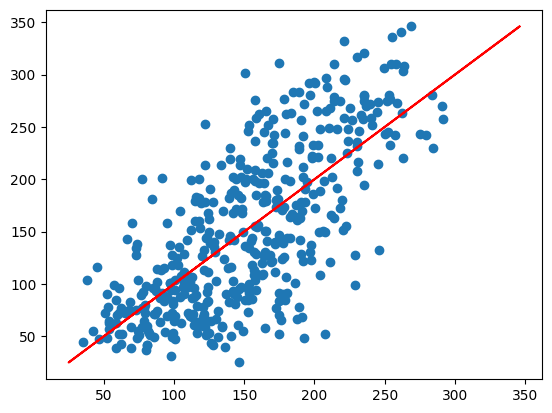


Ridge(random_state=42)
Mean squared error: 3254.14
score = 0.45123062774361744


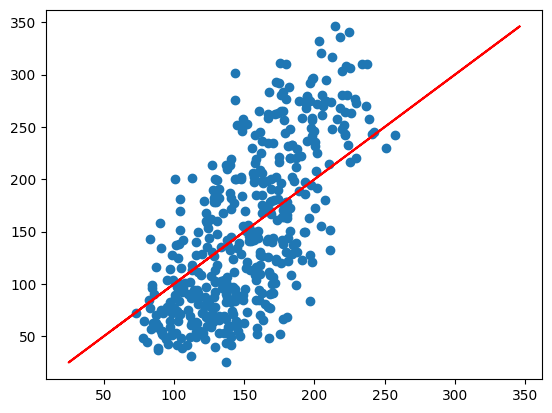


Lasso(random_state=42)
Mean squared error: 3810.67
score = 0.357378738231628


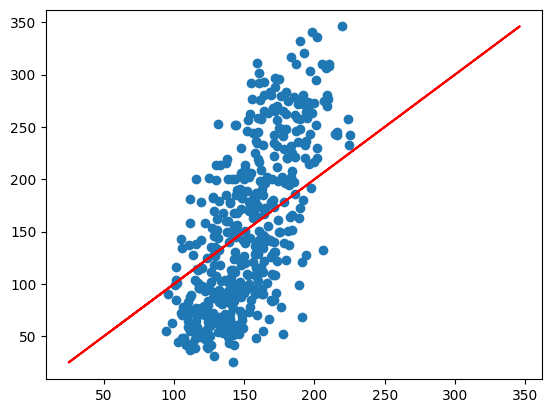


KNeighborsRegressor()
Mean squared error: 2342.56
score = 0.604957605699507


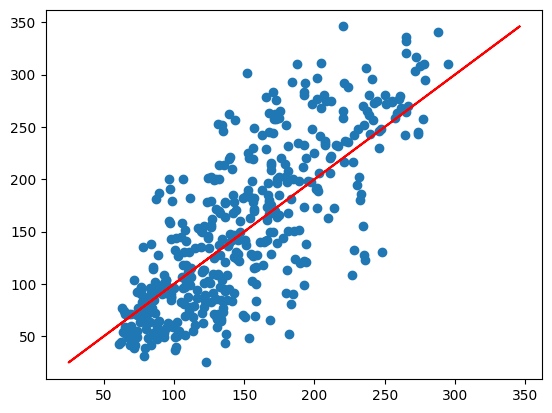


KNeighborsRegressor(n_neighbors=10)
Mean squared error: 2744.49
score = 0.5371770862256049


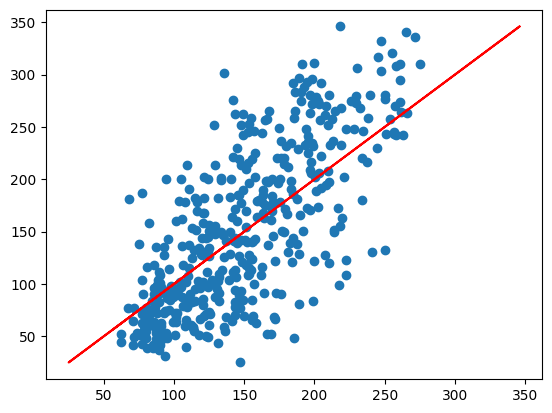

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=700)
Mean squared error: 3505.33
score = 0.4088697217200299


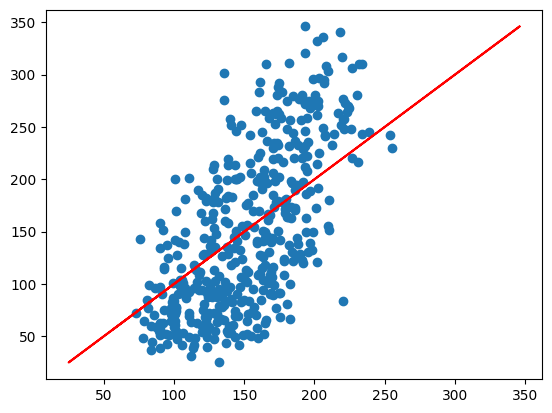


DecisionTreeRegressor()
Mean squared error: 0.00
score = 1.0


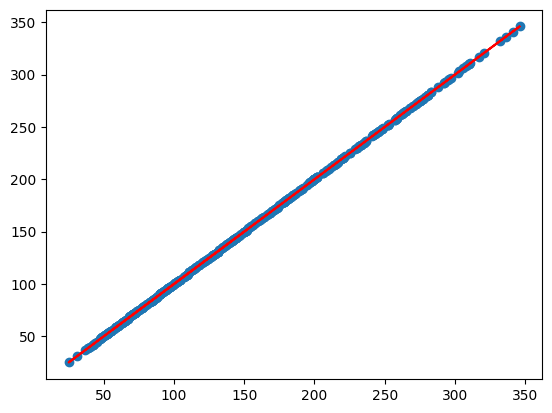


RandomForestRegressor(random_state=42)
Mean squared error: 476.82
score = 0.9195910933940452


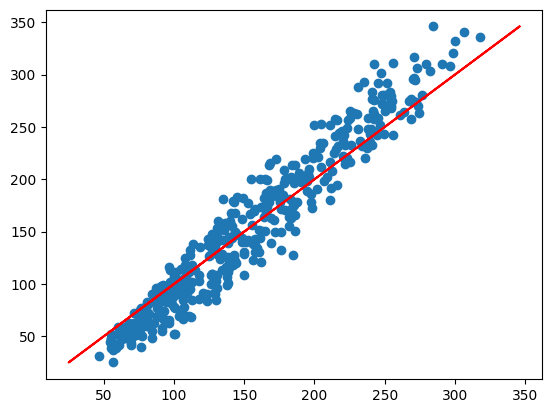


BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)
Mean squared error: 472.72
score = 0.9202821417323035


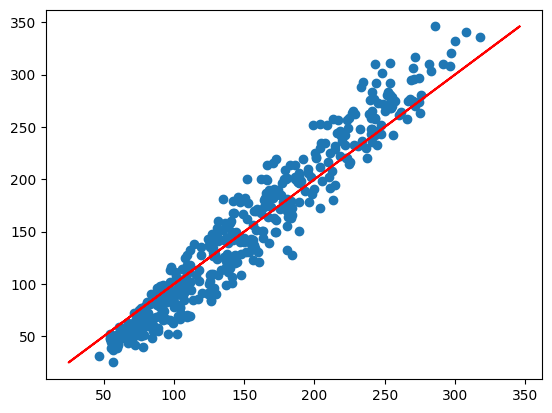

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

models = [LinearRegression(), Ridge(alpha=1.0, random_state=42), Lasso(alpha=1.0, random_state=42),
          KNeighborsRegressor(n_neighbors=5), KNeighborsRegressor(n_neighbors=10),
          MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, max_iter=700),
          DecisionTreeRegressor(), RandomForestRegressor(n_estimators=100, random_state=42),
          BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)]

for model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    print(model)
    print("Mean squared error: %.2f"
          % mean_squared_error(y_pred, y))
    print(f"score = {model.score(X, y)}")
    plt.scatter(y_pred, y)
    plt.plot(y, y, c='r')
    plt.show()
    print()